In [94]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import plotly.graph_objects as go

# Geometric Brownian Motion simulation + Integration with Historical Data

## Reasoning step by step

In [58]:
#Only 1 step, 1 day long

dt = 1/365
Z = np.random.normal(0, 1)
sigma = 0.2
mu = 0.05
S0 = 100
X0 = np.log(S0)
X = X0 + (mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z
S = np.exp(X) #Stock price at day 1, starting from S=100 at day 0

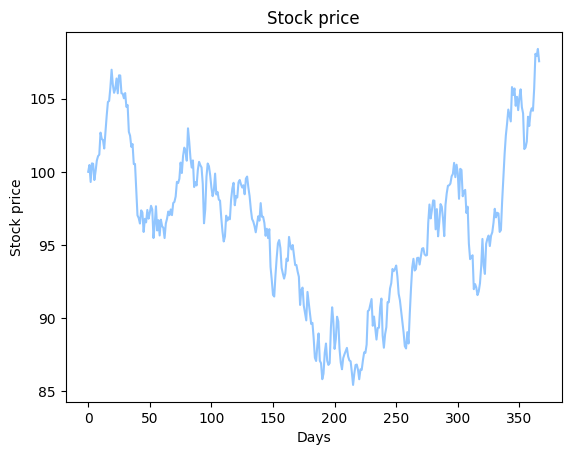

In [59]:
# 1 stock path for 1 year, day by day
dt = 1/365
n_steps = 365

sigma = 0.2
mu = 0.05

S0 = 100
X0 = np.log(S0)

Xlist=[X0]
Slist = [S0]

timeline = np.arange(0, 366, 1)

for i in timeline:
    Z = np.random.normal(0, 1)
    Xi = Xlist[i] + (mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z
    Xlist.append(Xi)
    Si = np.exp(Xi)
    Slist.append(Si)


plt.xlabel("Days")
plt.ylabel("Stock price")
plt.title("Stock price")
plt.plot(range(len(Slist)), Slist);

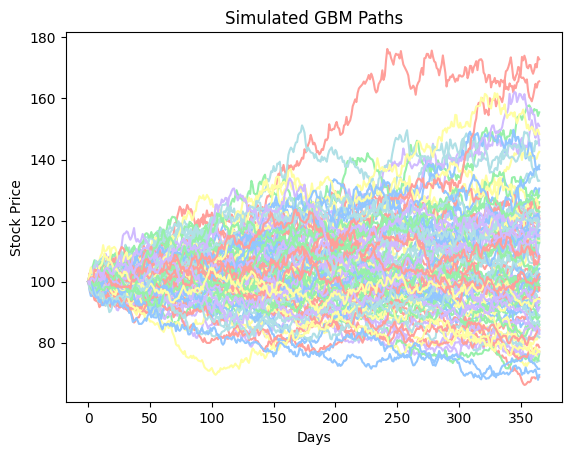

In [60]:
#1 stock - n paths
dt = 1/365
sigma = 0.2
mu = 0.05
S0 = 100
X0 = np.log(S0)

n_steps = 365
n_sim = 100

Xmatrix = np.zeros((n_steps+1,n_sim)) #each column = 1 path, #each row "i" = stock price at day "i"
Xmatrix[0, :] = X0 #first row (day 0) all equal to X0

Smatrix = np.zeros((n_steps+1,n_sim))
Smatrix[0, :] = S0

#create a loop that, for the day "i", determines X for all the n_path scenarios
for i in range(n_steps):
    Z = np.random.normal(0, 1, size=n_sim)
    Xi = Xmatrix[i, :] + (mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z
    Xmatrix[i+1, : ] = Xi

Smatrix = np.exp(Xmatrix)

#np.random.seed(42) #uncomment if you want to print everytime the same paths
for p in np.arange(0, n_sim):
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.title("Simulated GBM Paths")
    plt.plot(np.arange(0, n_steps+1), Smatrix[:, p])

In [74]:
#IMPORT HISTORICAL DATA
ticker = "AAPL" 
start_date="2024-01-01"
end_date="2025-01-01"
data = yf.download(ticker, start=start_date, end=end_date)
df = pd.DataFrame(data)
df_close = df["Close"]
df_close

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2024-01-02,184.290436
2024-01-03,182.910522
2024-01-04,180.587540
2024-01-05,179.862839
2024-01-08,184.210999
...,...
2024-12-24,257.578674
2024-12-26,258.396667
2024-12-27,254.974930


In [62]:
#VOLATILITY: daily volatility * sqrt(252) = log returns * 
log_returns = np.log(df_close / df_close.shift(1))
df["log_returns"] = log_returns
dailiysigma = log_returns.std()
annualsigma = log_returns.std()*np.sqrt(252)
print(f"-- DAILY VOLATILITY --\n{dailiysigma}")
print(f"-- ANNUAL VOLATILITY --\n{annualsigma}")

-- DAILY VOLATILITY --
Ticker
AAPL    0.014063
dtype: float64
-- ANNUAL VOLATILITY --
Ticker
AAPL    0.223238
dtype: float64


In [63]:
#DRIFT TERM
mu = np.mean(log_returns)*252 + (1/2) *annualsigma**2
mu

Ticker
AAPL    0.330347
dtype: float64

In [ ]:
#S0
S0 = df["Close"].iloc[-1]

In [76]:
def historicaldata(ticker):
    #SET 1 YEAR HISTORICAL DATA
    end_date_dt = datetime.today() - timedelta(days=1)
    start_date_dt = end_date_dt - timedelta(days=365)
    end_date = end_date_dt.strftime('%Y-%m-%d')
    start_date = start_date_dt.strftime('%Y-%m-%d')

    # DOWNLOAD HISTORICAL DATA
    data = yf.download(ticker, start=start_date, end=end_date)
    df = pd.DataFrame(data)
    df_close = df["Close"]
    log_returns = np.log(df_close / df_close.shift(1))
    df["log_returns"] = log_returns
    
    #LAST STOCK PRICE
    S0 = df["Close"].iloc[-1]
    
    #MU AND SIGMA CALCULATION
    dailiysigma = log_returns.std()
    annualsigma = log_returns.std()*np.sqrt(252)
    mu = np.mean(log_returns)*252 + (1/2) *annualsigma**2
    return S0, annualsigma, mu

## My Function

How to use the function:
- dt: use 1/365, i.e. the GBM progresses day by day
- sigma: put the annual volatility (e.g. 0.20 for 20%)
- mu: put the annual return (e.g. 0.05 for 5%
- S0: put the initial stock value
- n_steps: number of days you want to simulate (e.g 3 years --> n_steps = 1095)
- n_sim: number of paths

**------------------ STOCK PATH SIMULATION >>> $S_0, \mu, \sigma$ FIXED --------------------------**

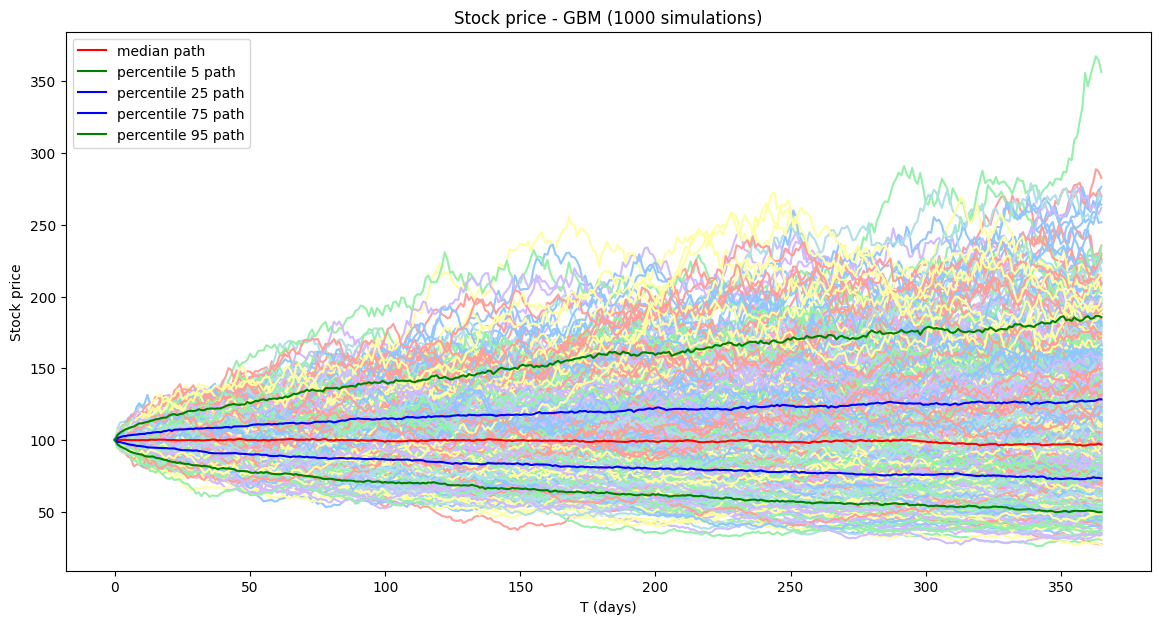

In [100]:
plt.style.use("seaborn-v0_8-pastel")
def GBMsimulation(dt, sigma, mu, S0, n_steps, n_sim):
    X0 = np.log(S0)
    Xmatrix = np.zeros((n_steps+1,n_sim)) #each column = 1 path, #each row "i" = stock price at day "i"
    Xmatrix[0, :] = X0 #first row (day 0) all equal to X0

    Smatrix = np.zeros((n_steps+1,n_sim))
    Smatrix[0, :] = S0

    #create a loop that, for the day "i", determines X for all the n_path scenarios
    for i in range(n_steps):
        Z = np.random.normal(0, 1, size=n_sim)
        Xi = Xmatrix[i, :] + (mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z
        Xmatrix[i+1, : ] = Xi

    Smatrix = np.exp(Xmatrix)
    
    #Median PATH
    median_path = np.median(Smatrix, axis=1)
    
    #p5, p25, p75, p95
    p5 = np.percentile(Smatrix, 5, axis=1)
    p25 = np.percentile(Smatrix, 25, axis=1)
    p75 = np.percentile(Smatrix, 75, axis=1)
    p95 = np.percentile(Smatrix, 95, axis=1)
    
    #Plot
    plt.figure(figsize=(14, 7))
    
    plt.plot(np.arange(n_steps+1), Smatrix)
    plt.plot(np.arange(n_steps+1), median_path, color="red", label="median path")
    plt.plot(np.arange(n_steps+1), p5, color="green", label="percentile 5 path")
    plt.plot(np.arange(n_steps+1), p25, color="blue", label="percentile 25 path")
    plt.plot(np.arange(n_steps+1), p75, color="blue", label="percentile 75 path")
    plt.plot(np.arange(n_steps+1), p95, color="green", label="percentile 95 path")
    plt.xlabel("T (days)")
    plt.ylabel("Stock price")
    plt.legend()
    plt.title(f"Stock price - GBM ({n_sim} simulations)")
    plt.show()
    
np.random.seed(42) #uncomment if you want to print everytime the same paths
GBMsimulation(1/365, 0.4, 0.05, 100, 365, 1000)    

**-------------------------STOCK PATH WITH HISTORICAL DATA INTEGRATION---------------------------**

How to use the function:
- ticker: use the stock ticker
- dt: use 1/365, therefore the GBM progresses day by day
- n_steps: number of days you want to simulate (e.g 3 years --> n_steps = 1095)
- n_sim: number of paths

[*********************100%***********************]  1 of 1 completed
C:\Users\MATTEO IENTILE\AppData\Local\Temp\ipykernel_28908\1396782151.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dailiysigma = float(log_returns.std())
C:\Users\MATTEO IENTILE\AppData\Local\Temp\ipykernel_28908\1396782151.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r'$S_0=%.2f$' % S0,


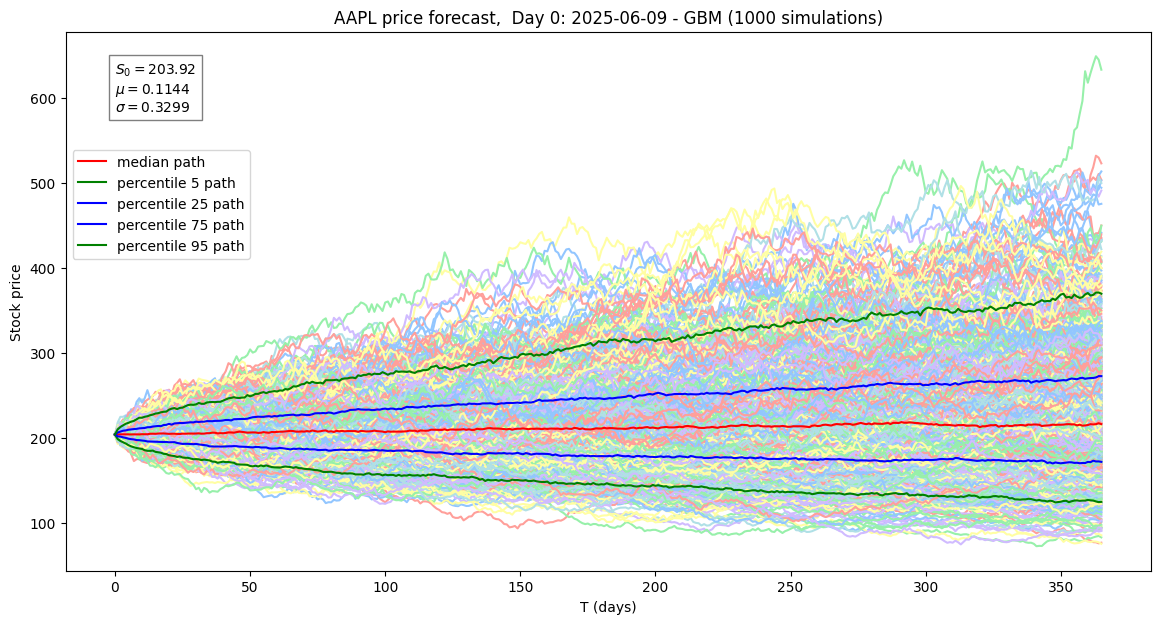

In [93]:
def GBMsimulationRD(ticker, dt, n_steps, n_sim):
    #SET 1 YEAR HISTORICAL DATA
    end_date_dt = datetime.today() - timedelta(days=1)
    start_date_dt = end_date_dt - timedelta(days=365)
    end_date = end_date_dt.strftime('%Y-%m-%d')
    start_date = start_date_dt.strftime('%Y-%m-%d')

    # DOWNLOAD HISTORICAL DATA
    data = yf.download(ticker, start=start_date, end=end_date)
    df = pd.DataFrame(data)
    df_close = df["Close"]
    log_returns = np.log(df_close / df_close.shift(1))
    df["log_returns"] = log_returns
    
    #LAST STOCK PRICE
    S0 = df["Close"].iloc[-1]
    
    #MU AND SIGMA CALCULATION
    dailiysigma = float(log_returns.std())
    sigma = float(dailiysigma * np.sqrt(252))
    mu = float(np.mean(log_returns)*252 + 0.5 * sigma**2)
    
    #----- GBM PATH ----
    X0 = np.log(S0)
    Xmatrix = np.zeros((n_steps+1,n_sim)) #each column = 1 path, #each row "i" = stock price at day "i"
    Xmatrix[0, :] = X0 #first row (day 0) all equal to X0

    Smatrix = np.zeros((n_steps+1,n_sim))
    Smatrix[0, :] = S0

    #create a loop that, for the day "i", determines X for all the n_path scenarios
    for i in range(n_steps):
        Z = np.random.normal(0, 1, size=n_sim)
        Xi = Xmatrix[i, :] + (mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z
        Xmatrix[i+1, : ] = Xi

    Smatrix = np.exp(Xmatrix)
    
    #Median PATH
    median_path = np.median(Smatrix, axis=1)
    
    #p5, p25, p75, p95
    p5 = np.percentile(Smatrix, 5, axis=1)
    p25 = np.percentile(Smatrix, 25, axis=1)
    p75 = np.percentile(Smatrix, 75, axis=1)
    p95 = np.percentile(Smatrix, 95, axis=1)
    
    #Plot
    plt.figure(figsize=(14, 7))
    
    plt.plot(np.arange(n_steps+1), Smatrix)
    plt.plot(np.arange(n_steps+1), median_path, color="red", label="median path")
    plt.plot(np.arange(n_steps+1), p5, color="green", label="percentile 5 path")
    plt.plot(np.arange(n_steps+1), p25, color="blue", label="percentile 25 path")
    plt.plot(np.arange(n_steps+1), p75, color="blue", label="percentile 75 path")
    plt.plot(np.arange(n_steps+1), p95, color="green", label="percentile 95 path")
    plt.xlabel("T (days)")
    plt.ylabel("Stock price")
    plt.title(f"{ticker} price forecast,  Day 0: {end_date} - GBM ({n_sim} simulations)")
    
    textstr = '\n'.join((
        r'$S_0=%.2f$' % S0,
        r'$\mu=%.4f$' % mu,
        r'$\sigma=%.4f$' % sigma))
    plt.text(x=0, y=max(Smatrix.flatten())*0.9, s=textstr, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.5))
    plt.legend(loc="center left", bbox_to_anchor=(0, 0.68))
    
    plt.show()
    
np.random.seed(42) #uncomment if you want to print everytime the same paths
GBMsimulationRD("AAPL", 1/365, 365, 1000)

# Professor proposal

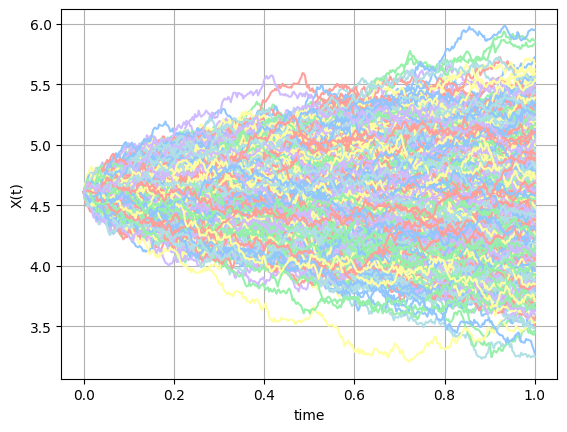

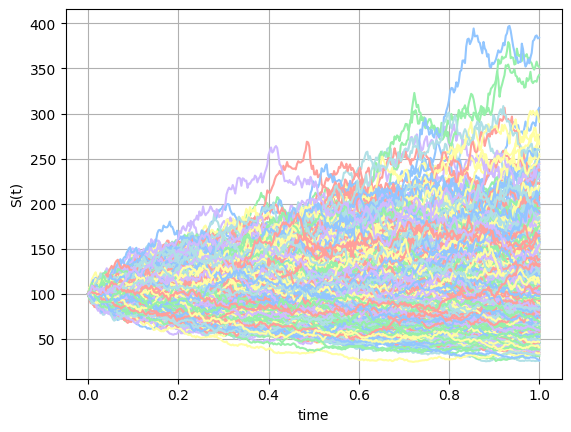

In [6]:
#%%
"""
Created on Thu Nov 27 2018
Paths for the GBM and ABM
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt


def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    
    # Fixing random seed
    np.random.seed(1)
        
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
            
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma **2 ) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    #Compute exponent of ABM
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 1000
    NoOfSteps = 365
    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100
    
    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
mainCalculation()